In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn import metrics

In [2]:
# Compute some unsupervised score for the given model
def bench_k_means(estimator, data, y=None):
    estimator.fit(data)
    scores = [
        "adjusted_rand_score",
        "adjusted_mutual_info_score",
        "silhouette_score",
        "homogeneity_score",
        "completeness_score",
        "v_measure_score",
    ]

    results = []
    for s in scores:
        if s not in ["silhouette_score"]:
            # with ground-truth
            # Yeah !
            score = getattr(metrics, s)(y, estimator.labels_)
        elif y is not None:
            # with NO ground-truth
            score = getattr(metrics, s)(data, estimator.labels_)
        else:
            continue
            
        results.append(score)
        
    return pd.DataFrame([results], columns=scores, index=["result"])

In [3]:
digits = datasets.load_digits()

<Figure size 640x480 with 0 Axes>

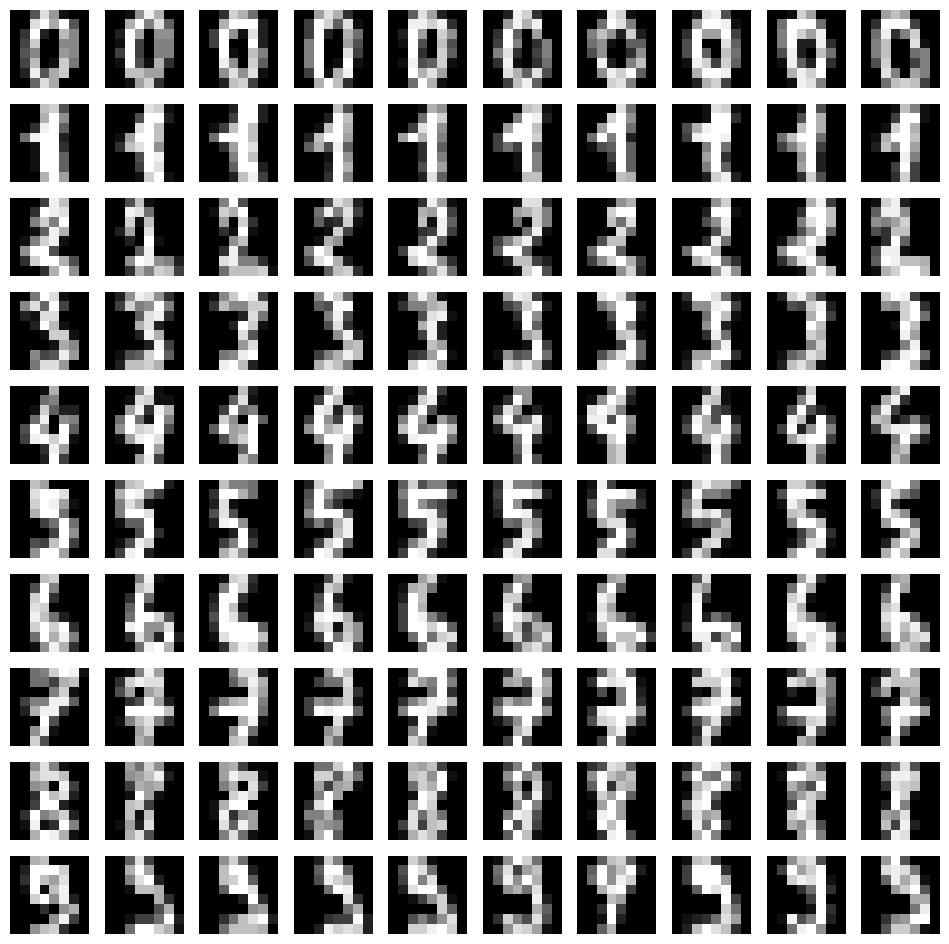

In [4]:
plt.gray() 

images = digits.images
Y = digits.target

unique_digits = np.unique(Y)
n_digits = len(unique_digits)

fig, axs = plt.subplots(n_digits, n_digits, figsize=(12, 12))
for i, target in enumerate(unique_digits):
    for j in range(n_digits):
        a = images[Y == target][j]
        axs[i,j].imshow(a)
        axs[i,j].axis('off')

In [5]:
# Try K-means

X = StandardScaler().fit_transform(digits.data)
y = digits.target

# Set K
K = n_digits

# Define model
model = KMeans(n_clusters=K, n_init=10)

# Test model
bench_k_means(model, X, y).round(2)
  


,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,homogeneity_score,completeness_score,v_measure_score
result,0.4,0.57,0.14,0.54,0.62,0.58


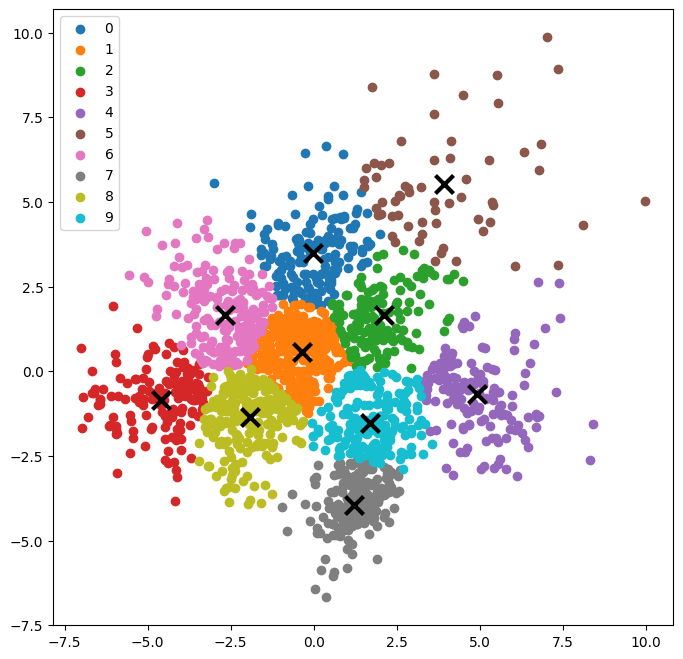

In [17]:
# Reducing the dataset dimension
pca = PCA(2) 
reduced_data = pca.fit_transform(X) 

model = KMeans(n_clusters=K, n_init=10)
kmeans_cluster = model.fit_predict(reduced_data) 
  
# Calculating the centroids 
centroids = model.cluster_centers_ 
label = model.fit_predict(reduced_data) 
unique_labels = np.unique(label) 
  
# plotting the clusters: 
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(reduced_data[label == i, 0], 
                reduced_data[label == i, 1], 
                label=i) 
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.legend() 
plt.show() 


In [8]:
label

array([1, 8, 1, ..., 1, 1, 7])

In [16]:
reduced_data[0:10,2]

array([-3.94602165,  3.92463089,  3.02335143, -0.80167257,  0.97324268,
       -1.57487741,  2.83127942,  0.65830104, -0.04094046, -1.56918349])